# Imports

In [2]:
import pandas as pd
import networkx as nx
import Temporal_Metrics as tm
import importlib
import Slice_Plot as sp

# Load Clean

In [3]:
jets = pd.read_pickle('Datasets\Jets-Final.pkl')

jets

,Date,Departure,Arrival,Distance (Miles),Flight Time (Mins),Fuel (Gallons),Carbon Emissions (Metric Tons),Celebrity,Departure Code,Arrival Code
0,2023-08-26,Hollywood Burbank Airport,Nashville International Airport,1790,295,1500,20,Taylor Swift,BUR,BNA
1,2023-07-24,Paine Field Airport,Nashville International Airport,1938,250,1100,15,Taylor Swift,PAE,BNA
2,2023-07-28,Nashville International Airport,San Jose International Airport,1981,249,1000,13,Taylor Swift,BNA,SJC
3,2023-07-30,San Jose International Airport,Nashville International Airport,1864,238,1300,17,Taylor Swift,SJC,BNA
4,2023-08-02,Nashville International Airport,Hollywood Burbank Airport,1697,227,1000,14,Taylor Swift,BNA,BUR
...,...,...,...,...,...,...,...,...,...,...
1264,2023-12-13,Camarillo Airport,Van Nuys Airport,40,44,370,4,Kim Kardashian,CMA,VNY
1265,2023-07-31,Van Nuys Airport,Los Angeles International Airport,20,44,370,4,Kim Kardashian,VNY,LAX
1266,2023-07-27,Camarillo Airport,Van Nuys Airport,40,44,370,4,Kim Kardashian,CMA,VNY
1267,2023-04-30,Van Nuys Airport,McCarran International Airport,230,43,360,4,Kim Kardashian,VNY,LAS


In [ ]:
#get the min date
min_date = jets['Date'].min()
min_date

In [ ]:
jets.describe(include='all', datetime_is_numeric = True).iloc[:3]

In [ ]:
# Get the count of departure and arrivals combined
airports = pd.concat([jets['Departure'], jets['Arrival']]).value_counts().head(10)

# Plot the count of departure and arrivals combined
airports.plot(kind='bar', figsize=(15, 5), color='skyblue', xlabel='Airport', ylabel='Count', title='Top 10 Airports with Most Departures and Arrivals');

In [ ]:
#Aggregate the carbon emissions by celebrity
celebrity_emissions = jets.groupby('Celebrity')['Carbon Emissions (Metric Tons)'].sum().sort_values(ascending=False)

#plot the carbon emissions by celebrity
celebrity_emissions.plot(kind='bar', figsize=(12, 6), color='skyblue', title='Total Carbon Emissions by Celebrity', ylabel='Carbon Emissions (Metric Tons)');

In [ ]:
#Get the average flight time per celebrity
celebrity_flight_time = jets.groupby('Celebrity')['Flight Time (Mins)'].mean().sort_values(ascending=False)

#plot the average flight time per celebrity
celebrity_flight_time.plot(kind='bar', figsize=(12, 6), color='skyblue', title='Average Flight Time by Celebrity', ylabel='Flight Time (Mins)');

# NetworkX

In [40]:
#Create a directed graph
G = nx.MultiDiGraph()

# create a temporal network
for index, row in jets.iterrows():
    G.add_node(row['Departure Code'], location=row['Departure'])
    G.add_node(row['Arrival Code'], location=row['Arrival'])
    # Add an edge with attributes
    G.add_edge(row['Departure Code'], row['Arrival Code'], time=row['Date'],
               flight_time=row['Flight Time (Mins)'], fuel=row['Fuel (Gallons)'],
               emissions=row['Carbon Emissions (Metric Tons)'])

print(G)

MultiDiGraph with 252 nodes and 1263 edges


In [ ]:
importlib.reload(tm)

#Calculate the temporal degree, betweenness and closeness
degree = pd.Series(tm.temporal_degree(G)).sort_values(ascending=False)
betweenness = pd.Series(tm.temporal_betweenness(G)).sort_values(ascending=False)
closeness = pd.Series(tm.temporal_closeness(G)).sort_values(ascending=False)

df_metrics = pd.DataFrame({
    'Degree': degree,
    'Betweenness': betweenness,
    'Closeness': closeness
})




In [49]:
df_metrics['Closeness'].sort_values(ascending=False).head(10)

RIL    5.370116e-10
CMA    5.321302e-10
YYZ    5.320967e-10
VNY    5.320966e-10
CEC    5.320887e-10
BUR    5.296328e-10
AUS    5.296306e-10
OAK    5.296301e-10
TEB    5.225149e-10
PHL    5.225148e-10
dtype: float64

In [47]:
df_metrics.mean().sort_values(ascending=False)

NameError: name 'df_metrics' is not defined

# Slice Plot Graph

In [4]:
#Get last ten flights of Taylor Swift
jets2 = jets[jets['Celebrity'] == 'Donald Trump'].copy().iloc[-10:]

jets2

,Date,Departure,Arrival,Distance (Miles),Flight Time (Mins),Fuel (Gallons),Carbon Emissions (Metric Tons),Celebrity,Departure Code,Arrival Code
263,2023-10-15,Daytona Beach International Airport,Palm Beach International Airport,194,49,8300,47,Donald Trump,DAB,PBI
264,2024-05-01,General Mitchell International Airport,Mbs International Airport,200,47,4500,26,Donald Trump,MKE,MBS
265,2024-05-05,Palm Beach International Airport,Fort Lauderdale Hollywood International Airport,50,46,4400,25,Donald Trump,PBI,FLL
266,2023-11-04,Palm Beach International Airport,Orlando International Airport,156,46,5300,30,Donald Trump,PBI,MCO
267,2024-03-26,Linden Airport,South Jersey Regional Airport,60,45,4400,25,Donald Trump,LDJ,LLY
268,2023-08-08,Logan International Airport,Newark International Airport,222,45,4000,23,Donald Trump,BOS,EWR
269,2023-05-01,Dyce Airport,Prestwick Airport,152,44,3400,19,Donald Trump,ABZ,PIK
270,2023-12-17,Tampa International Airport,Palm Beach International Airport,174,43,4200,24,Donald Trump,TPA,PBI
271,2023-04-21,Palm Beach International Airport,Southwest Florida International Airport,113,37,3000,17,Donald Trump,PBI,RSW
272,2023-11-04,Orlando International Airport,Palm Beach International Airport,155,36,5900,34,Donald Trump,MCO,PBI


In [5]:
#Create a directed new graph
t = nx.MultiDiGraph()

# create a temporal network
for index, row in jets2.iterrows():
    t.add_node(row['Departure Code'], location=row['Departure'])
    t.add_node(row['Arrival Code'], location=row['Arrival'])
    # Add an edge with attributes
    t.add_edge(row['Departure Code'], row['Arrival Code'], time=row['Date'])
    

print(t)


MultiDiGraph with 14 nodes and 10 edges


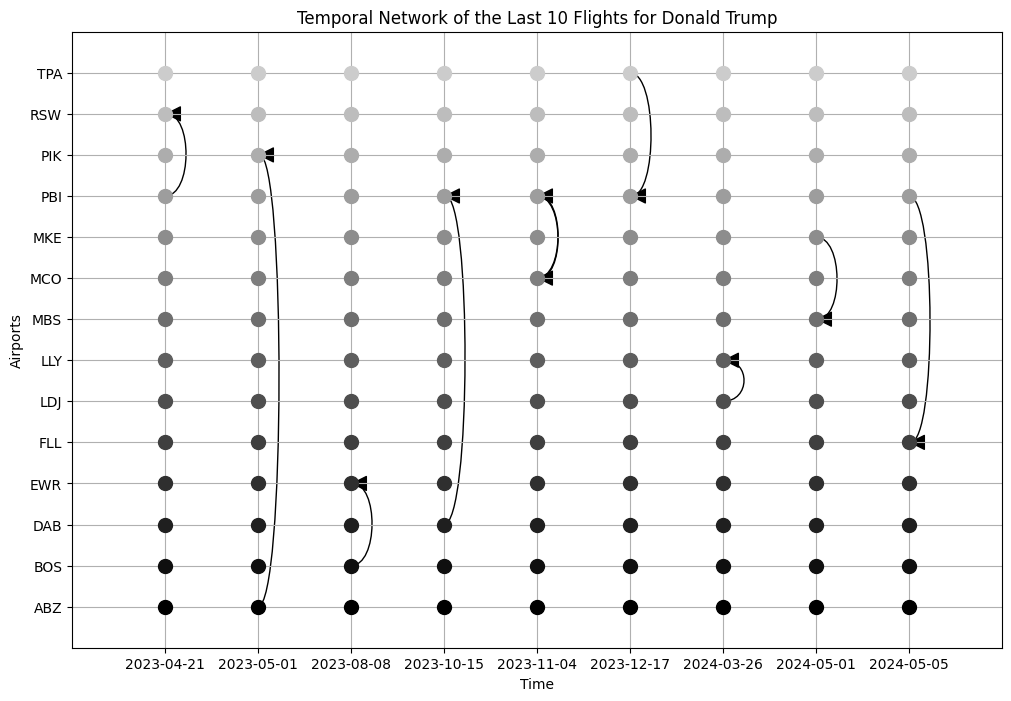

In [7]:
importlib.reload(sp)

#Plot the last 10 flights of Donald Trump
title = 'Temporal Network of the Last 10 Flights for Donald Trump'
ylabel = 'Airports'

sp.slice_plot(t, title, ylabel)

# Pathpy (Not Fully Working)

In [ ]:
import torch
from torch_geometric.data import TemporalData
import pathpyG as pp

In [ ]:
# jets = jets[jets['Celebrity'].str.contains('Taylor Swift')].copy()

# Get chronological order of the days
min_d = jets['Date'].min()
max_d = jets['Date'].max()
num_days = (max_d - min_d).days
jets.loc[:, 'day_number'] = (jets['Date'] - min_d).dt.days + 1
jets.loc[:, 'day_number'] = jets.groupby('day_number').ngroup() + 1

#Map the celebrities to colors
color_mapping = {
    value: 'red' if value == 'Taylor Swift'
    else 'green' if value == 'Elon Musk' 
    else 'blue' if value == 'Donald Trump' 
    else 'yellow' if value == 'Michael Bloomberg' 
    else 'purple' if value == 'Nike Corporation' 
    else 'orange' if value == 'Drake' 
    else 'pink' if value == 'Kylie Jenner' 
    else 'brown' if value == 'Kim Kardashian' 
    else 'white' for value in jets['Celebrity'].unique()
}


jets['color'] = jets['Celebrity'].map(color_mapping)
jets = jets.sort_values(by='day_number')


colours = jets['color'].values.tolist()
jets

In [ ]:
#Configure Pathpy
pp.config['torch']['device'] = 'cpu'

In [ ]:
#make an edge list
edges = []
for index, row in jets2.iterrows():
    edges.append([row['Departure'], row['Arrival'], row['day_number']])
# edges
t = pp.TemporalGraph.from_edge_list(edges)

print(t)

In [ ]:
#Add a style to the plot
style = {}
style['edge_color'] = colours

#plot the temporal graph
pp.plot(t, **style, node_label = [str(t.mapping.to_id(i)) for i in range(t.N)], delta = 1000)


In [ ]:
#Not fully tested code here onwards

dag = pp.algorithms.temporal_graph_to_event_dag(t, delta=1, create_mapping=True)

bc = pp.algorithms.centrality.closeness_centrality(dag)
# Convert keys and values to lists
keys = list(bc.keys())
values = list(bc.values())

# Create DataFrame
df = pd.DataFrame(keys, columns=['Source', 'Target', 'Time'])
df['Closeness Centrality'] = values

# pp.plot(dag, node_label = [str(dag.mapping.to_id(i)) for i in range(dag.N)])
df.sort_values(by='Closeness Centrality', ascending=False)


In [ ]:
m = pp.MultiOrderModel.from_temporal_graph(t, delta=1, max_order=4)

pp.plot(m.layers[1], node_label=[v for v in m.layers[1].nodes])

In [ ]:
pp.plot(m.layers[2], node_label=[v for v in m.layers[2].nodes])